In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import math

In [4]:
SmartMeter = pd.read_csv('/Users/yukai/Desktop/halfhourly_dataset(MAC004179).csv')
SmartMeter.head(10)

,Unnamed: 0,LCLid,tstp,energy(kWh/hh),SUM
0,0,MAC004179,2013-01-01 00:00:00.0000000,1.490,1.490
1,1,MAC004179,2013-01-01 00:30:00.0000000,1.258,2.748
2,2,MAC004179,2013-01-01 01:00:00.0000000,1.480,4.228
3,3,MAC004179,2013-01-01 01:30:00.0000000,1.328,5.556
4,4,MAC004179,2013-01-01 02:00:00.0000000,1.445,7.001
5,5,MAC004179,2013-01-01 02:30:00.0000000,1.243,8.244
6,6,MAC004179,2013-01-01 03:00:00.0000000,1.565,9.809
7,7,MAC004179,2013-01-01 03:30:00.0000000,1.280,11.089
8,8,MAC004179,2013-01-01 04:00:00.0000000,1.339,12.428
9,9,MAC004179,2013-01-01 04:30:00.0000000,1.417,13.845


In [5]:
SmartMeter_original = SmartMeter['energy(kWh/hh)'][0:48].to_numpy()
print(SmartMeter_original)

[1.49  1.258 1.48  1.328 1.445 1.243 1.565 1.28  1.339 1.417 1.3   1.503
 1.18  1.342 1.471 1.443 1.543 1.41  1.465 1.357 1.531 1.394 1.342 1.545
 1.419 1.562 1.291 1.49  1.307 1.39  1.308 1.254 1.57  1.371 1.426 1.555
 1.391 1.312 1.506 1.282 1.703 1.371 1.36  1.441 1.583 1.263 1.954 1.498]


In [6]:
# Bounded-Error Run Length Encoding(BERLE)
# Define High Precision Bounded-Error
bounded_error_high_precision = 0.02
temp1 = SmartMeter_original
upperBounded = temp1 + bounded_error_high_precision
lowerBounded = temp1 - bounded_error_high_precision
print(upperBounded)
print(temp1)
print(lowerBounded)

[1.51  1.278 1.5   1.348 1.465 1.263 1.585 1.3   1.359 1.437 1.32  1.523
 1.2   1.362 1.491 1.463 1.563 1.43  1.485 1.377 1.551 1.414 1.362 1.565
 1.439 1.582 1.311 1.51  1.327 1.41  1.328 1.274 1.59  1.391 1.446 1.575
 1.411 1.332 1.526 1.302 1.723 1.391 1.38  1.461 1.603 1.283 1.974 1.518]
[1.49  1.258 1.48  1.328 1.445 1.243 1.565 1.28  1.339 1.417 1.3   1.503
 1.18  1.342 1.471 1.443 1.543 1.41  1.465 1.357 1.531 1.394 1.342 1.545
 1.419 1.562 1.291 1.49  1.307 1.39  1.308 1.254 1.57  1.371 1.426 1.555
 1.391 1.312 1.506 1.282 1.703 1.371 1.36  1.441 1.583 1.263 1.954 1.498]
[1.47  1.238 1.46  1.308 1.425 1.223 1.545 1.26  1.319 1.397 1.28  1.483
 1.16  1.322 1.451 1.423 1.523 1.39  1.445 1.337 1.511 1.374 1.322 1.525
 1.399 1.542 1.271 1.47  1.287 1.37  1.288 1.234 1.55  1.351 1.406 1.535
 1.371 1.292 1.486 1.262 1.683 1.351 1.34  1.421 1.563 1.243 1.934 1.478]


In [7]:
# BERLE Algorithm
upperBound = upperBounded[0]
lowerBound = lowerBounded[0]

counter = 0
index = 0
bOverlap = False
dataSize = np.size(temp1)
print(dataSize)

high_precision_RLE = []
high_precision_result = []

while True :
    if (index == dataSize):
        high_precision_RLE.append(round(lowerBound,3))
        high_precision_RLE.append(counter)
        for i in range(counter):
            high_precision_result.append(round(lowerBound,3))
        break
    # 上下界都在範圍內
    if (upperBounded[index] <= upperBound and lowerBounded[index] >= lowerBound):
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
        counter = counter + 1
    # 只有上界在範圍內
    elif (upperBounded[index] > lowerBound and upperBounded[index] <= upperBound):
        upperBound = upperBounded[index]
        counter = counter + 1
    # 只有下界在範圍內    
    elif (lowerBounded[index] >= lowerBound and lowerBounded[index] < upperBound):
        lowerBound = lowerBounded[index]
        counter = counter + 1
    #     
    elif (upperBounded[index] > upperBound and lowerBounded[index] < lowerBound):
        counter = counter + 1
    #    
    else:
        high_precision_RLE.append(round(lowerBound,3))
        high_precision_RLE.append(counter)

        for i in range(counter):
            high_precision_result.append(round(lowerBound,3))
        counter = 1
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
    index = index + 1
# print(len(high_precision_RLE))
# print(high_precision_RLE)
for i in high_precision_result:
    print(i)

48
1.47
1.238
1.46
1.308
1.425
1.223
1.545
1.26
1.319
1.397
1.28
1.483
1.16
1.322
1.451
1.451
1.523
1.39
1.445
1.337
1.511
1.374
1.322
1.525
1.399
1.542
1.271
1.47
1.287
1.37
1.288
1.234
1.55
1.351
1.406
1.535
1.371
1.292
1.486
1.262
1.683
1.351
1.351
1.421
1.563
1.243
1.934
1.478


In [8]:
# Layered BERLE(LBE-RLE)
# Define Medium Precision Bounded-Error
bounded_error_medium_precision = 0.04
difference_bounded_error = bounded_error_medium_precision - bounded_error_high_precision

temp2 = np.array(high_precision_result)

upperBounded = temp2 + difference_bounded_error
lowerBounded = temp2 - difference_bounded_error
print(upperBounded)
print(temp2)
print(lowerBounded)

[1.49  1.258 1.48  1.328 1.445 1.243 1.565 1.28  1.339 1.417 1.3   1.503
 1.18  1.342 1.471 1.471 1.543 1.41  1.465 1.357 1.531 1.394 1.342 1.545
 1.419 1.562 1.291 1.49  1.307 1.39  1.308 1.254 1.57  1.371 1.426 1.555
 1.391 1.312 1.506 1.282 1.703 1.371 1.371 1.441 1.583 1.263 1.954 1.498]
[1.47  1.238 1.46  1.308 1.425 1.223 1.545 1.26  1.319 1.397 1.28  1.483
 1.16  1.322 1.451 1.451 1.523 1.39  1.445 1.337 1.511 1.374 1.322 1.525
 1.399 1.542 1.271 1.47  1.287 1.37  1.288 1.234 1.55  1.351 1.406 1.535
 1.371 1.292 1.486 1.262 1.683 1.351 1.351 1.421 1.563 1.243 1.934 1.478]
[1.45  1.218 1.44  1.288 1.405 1.203 1.525 1.24  1.299 1.377 1.26  1.463
 1.14  1.302 1.431 1.431 1.503 1.37  1.425 1.317 1.491 1.354 1.302 1.505
 1.379 1.522 1.251 1.45  1.267 1.35  1.268 1.214 1.53  1.331 1.386 1.515
 1.351 1.272 1.466 1.242 1.663 1.331 1.331 1.401 1.543 1.223 1.914 1.458]


In [9]:
# LBE-RLE Algorithm
upperBound = upperBounded[0]
lowerBound = lowerBounded[0]

counter = 0
index = 0
bOverlap = False
# dataSize = np.size(temp1)
# print(dataSize)

medium_precision_RLE = []
medium_precision_result = []

while True :
    if (index == dataSize):
        # Random Choose LBE-RLE Symbol from Region
        symbol = random.uniform(lowerBound, upperBound)
        
        medium_precision_RLE.append(round(symbol,3))
        medium_precision_RLE.append(counter)
        for i in range(counter):
            medium_precision_result.append(round(symbol,3))
        break
    # 上下界都在範圍內
    if (upperBounded[index] <= upperBound and lowerBounded[index] >= lowerBound):
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
        counter = counter + 1
    # 只有上界在範圍內
    elif (upperBounded[index] > lowerBound and upperBounded[index] <= upperBound):
        upperBound = upperBounded[index]
        counter = counter + 1
    # 只有下界在範圍內    
    elif (lowerBounded[index] >= lowerBound and lowerBounded[index] < upperBound):
        lowerBound = lowerBounded[index]
        counter = counter + 1
    #     
    elif (upperBounded[index] > upperBound and lowerBounded[index] < lowerBound):
        counter = counter + 1
    #    
    else:
        # Random Choose LBE-RLE Symbol from Region
        symbol = random.uniform(lowerBound, upperBound)
        
        medium_precision_RLE.append(round(symbol,3))
        medium_precision_RLE.append(counter)

        for i in range(counter):
            medium_precision_result.append(round(symbol,3))
        counter = 1
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
    index = index + 1
# print(len(medium_precision_RLE))
# print(medium_precision_RLE)
for i in medium_precision_result:
    print(i)

1.476
1.253
1.472
1.295
1.409
1.24
1.56
1.259
1.333
1.395
1.295
1.478
1.145
1.312
1.461
1.461
1.506
1.403
1.441
1.331
1.504
1.359
1.302
1.518
1.401
1.527
1.287
1.474
1.298
1.386
1.297
1.221
1.538
1.358
1.411
1.537
1.387
1.31
1.474
1.276
1.677
1.355
1.355
1.406
1.566
1.258
1.937
1.481


In [10]:
# Layered BERLE(LBE-RLE)
# Define Low Precision Bounded-Error
bounded_error_low_precision = 0.06
difference_bounded_error = bounded_error_low_precision - bounded_error_high_precision

temp3 = np.array(high_precision_result)

upperBounded = temp3 + difference_bounded_error
lowerBounded = temp3 - difference_bounded_error
print(upperBounded)
print(temp3)
print(lowerBounded)

[1.51  1.278 1.5   1.348 1.465 1.263 1.585 1.3   1.359 1.437 1.32  1.523
 1.2   1.362 1.491 1.491 1.563 1.43  1.485 1.377 1.551 1.414 1.362 1.565
 1.439 1.582 1.311 1.51  1.327 1.41  1.328 1.274 1.59  1.391 1.446 1.575
 1.411 1.332 1.526 1.302 1.723 1.391 1.391 1.461 1.603 1.283 1.974 1.518]
[1.47  1.238 1.46  1.308 1.425 1.223 1.545 1.26  1.319 1.397 1.28  1.483
 1.16  1.322 1.451 1.451 1.523 1.39  1.445 1.337 1.511 1.374 1.322 1.525
 1.399 1.542 1.271 1.47  1.287 1.37  1.288 1.234 1.55  1.351 1.406 1.535
 1.371 1.292 1.486 1.262 1.683 1.351 1.351 1.421 1.563 1.243 1.934 1.478]
[1.43  1.198 1.42  1.268 1.385 1.183 1.505 1.22  1.279 1.357 1.24  1.443
 1.12  1.282 1.411 1.411 1.483 1.35  1.405 1.297 1.471 1.334 1.282 1.485
 1.359 1.502 1.231 1.43  1.247 1.33  1.248 1.194 1.51  1.311 1.366 1.495
 1.331 1.252 1.446 1.222 1.643 1.311 1.311 1.381 1.523 1.203 1.894 1.438]


In [11]:
# LBE-RLE Algorithm
upperBound = upperBounded[0]
lowerBound = lowerBounded[0]

counter = 0
index = 0
bOverlap = False
dataSize = np.size(temp1)
print(dataSize)

low_precision_RLE = []
low_precision_result = []

while True :
    if (index == dataSize):
        # Random Choose LBE-RLE Symbol from Region
        symbol = random.uniform(lowerBound, upperBound)
        
        low_precision_RLE.append(round(symbol,3))
        low_precision_RLE.append(counter)
        for i in range(counter):
            low_precision_result.append(round(symbol,3))
        break
    # 上下界都在範圍內
    if (upperBounded[index] <= upperBound and lowerBounded[index] >= lowerBound):
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
        counter = counter + 1
    # 只有上界在範圍內
    elif (upperBounded[index] > lowerBound and upperBounded[index] <= upperBound):
        upperBound = upperBounded[index]
        counter = counter + 1
    # 只有下界在範圍內    
    elif (lowerBounded[index] >= lowerBound and lowerBounded[index] < upperBound):
        lowerBound = lowerBounded[index]
        counter = counter + 1
    #     
    elif (upperBounded[index] > upperBound and lowerBounded[index] < lowerBound):
        counter = counter + 1
    #    
    else:
        # Random Choose LBE-RLE Symbol from Region
        symbol = random.uniform(lowerBound, upperBound)
        
        low_precision_RLE.append(round(symbol,3))
        low_precision_RLE.append(counter)

        for i in range(counter):
            low_precision_result.append(round(symbol,3))
        counter = 1
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
    index = index + 1
# print(len(low_precision_RLE))
# print(low_precision_RLE)
for i in low_precision_result:
    print(i)

48
1.492
1.227
1.428
1.307
1.428
1.2
1.57
1.29
1.29
1.432
1.244
1.507
1.193
1.323
1.484
1.484
1.484
1.412
1.412
1.323
1.509
1.359
1.359
1.536
1.421
1.53
1.235
1.474
1.27
1.345
1.255
1.255
1.519
1.386
1.386
1.554
1.332
1.332
1.46
1.285
1.669
1.387
1.387
1.387
1.528
1.25
1.912
1.515


In [12]:
# Layered BERLE(LBE-RLE)
# Define Low Precision Bounded-Error
bounded_error_low_low_precision = 0.08
difference_bounded_error = bounded_error_low_low_precision - bounded_error_high_precision

temp4 = np.array(high_precision_result)

upperBounded = temp4 + difference_bounded_error
lowerBounded = temp4 - difference_bounded_error
print(upperBounded)
print(temp4)
print(lowerBounded)

[1.53  1.298 1.52  1.368 1.485 1.283 1.605 1.32  1.379 1.457 1.34  1.543
 1.22  1.382 1.511 1.511 1.583 1.45  1.505 1.397 1.571 1.434 1.382 1.585
 1.459 1.602 1.331 1.53  1.347 1.43  1.348 1.294 1.61  1.411 1.466 1.595
 1.431 1.352 1.546 1.322 1.743 1.411 1.411 1.481 1.623 1.303 1.994 1.538]
[1.47  1.238 1.46  1.308 1.425 1.223 1.545 1.26  1.319 1.397 1.28  1.483
 1.16  1.322 1.451 1.451 1.523 1.39  1.445 1.337 1.511 1.374 1.322 1.525
 1.399 1.542 1.271 1.47  1.287 1.37  1.288 1.234 1.55  1.351 1.406 1.535
 1.371 1.292 1.486 1.262 1.683 1.351 1.351 1.421 1.563 1.243 1.934 1.478]
[1.41  1.178 1.4   1.248 1.365 1.163 1.485 1.2   1.259 1.337 1.22  1.423
 1.1   1.262 1.391 1.391 1.463 1.33  1.385 1.277 1.451 1.314 1.262 1.465
 1.339 1.482 1.211 1.41  1.227 1.31  1.228 1.174 1.49  1.291 1.346 1.475
 1.311 1.232 1.426 1.202 1.623 1.291 1.291 1.361 1.503 1.183 1.874 1.418]


In [13]:
# LBE-RLE Algorithm
upperBound = upperBounded[0]
lowerBound = lowerBounded[0]

counter = 0
index = 0
bOverlap = False
dataSize = np.size(temp1)
print(dataSize)

low_low_precision_RLE = []
low_low_precision_result = []

while True :
    if (index == dataSize):
        # Random Choose LBE-RLE Symbol from Region
        symbol = random.uniform(lowerBound, upperBound)
        
        low_low_precision_RLE.append(round(symbol,3))
        low_low_precision_RLE.append(counter)
        for i in range(counter):
            low_low_precision_result.append(round(symbol,3))
        break
    # 上下界都在範圍內
    if (upperBounded[index] <= upperBound and lowerBounded[index] >= lowerBound):
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
        counter = counter + 1
    # 只有上界在範圍內
    elif (upperBounded[index] > lowerBound and upperBounded[index] <= upperBound):
        upperBound = upperBounded[index]
        counter = counter + 1
    # 只有下界在範圍內    
    elif (lowerBounded[index] >= lowerBound and lowerBounded[index] < upperBound):
        lowerBound = lowerBounded[index]
        counter = counter + 1
    #     
    elif (upperBounded[index] > upperBound and lowerBounded[index] < lowerBound):
        counter = counter + 1
    #    
    else:
        # Random Choose LBE-RLE Symbol from Region
        symbol = random.uniform(lowerBound, upperBound)
        
        low_low_precision_RLE.append(round(symbol,3))
        low_low_precision_RLE.append(counter)

        for i in range(counter):
            low_low_precision_result.append(round(symbol,3))
        counter = 1
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
    index = index + 1
# print(len(low_low_precision_RLE))
# print(low_low_precision_RLE)
for i in low_low_precision_result:
    print(i)

48
1.526
1.275
1.508
1.367
1.367
1.176
1.55
1.308
1.308
1.338
1.338
1.535
1.109
1.292
1.467
1.467
1.467
1.386
1.386
1.386
1.535
1.368
1.368
1.571
1.349
1.49
1.215
1.505
1.328
1.328
1.328
1.222
1.525
1.354
1.354
1.476
1.349
1.349
1.495
1.313
1.696
1.372
1.372
1.372
1.534
1.262
1.918
1.512


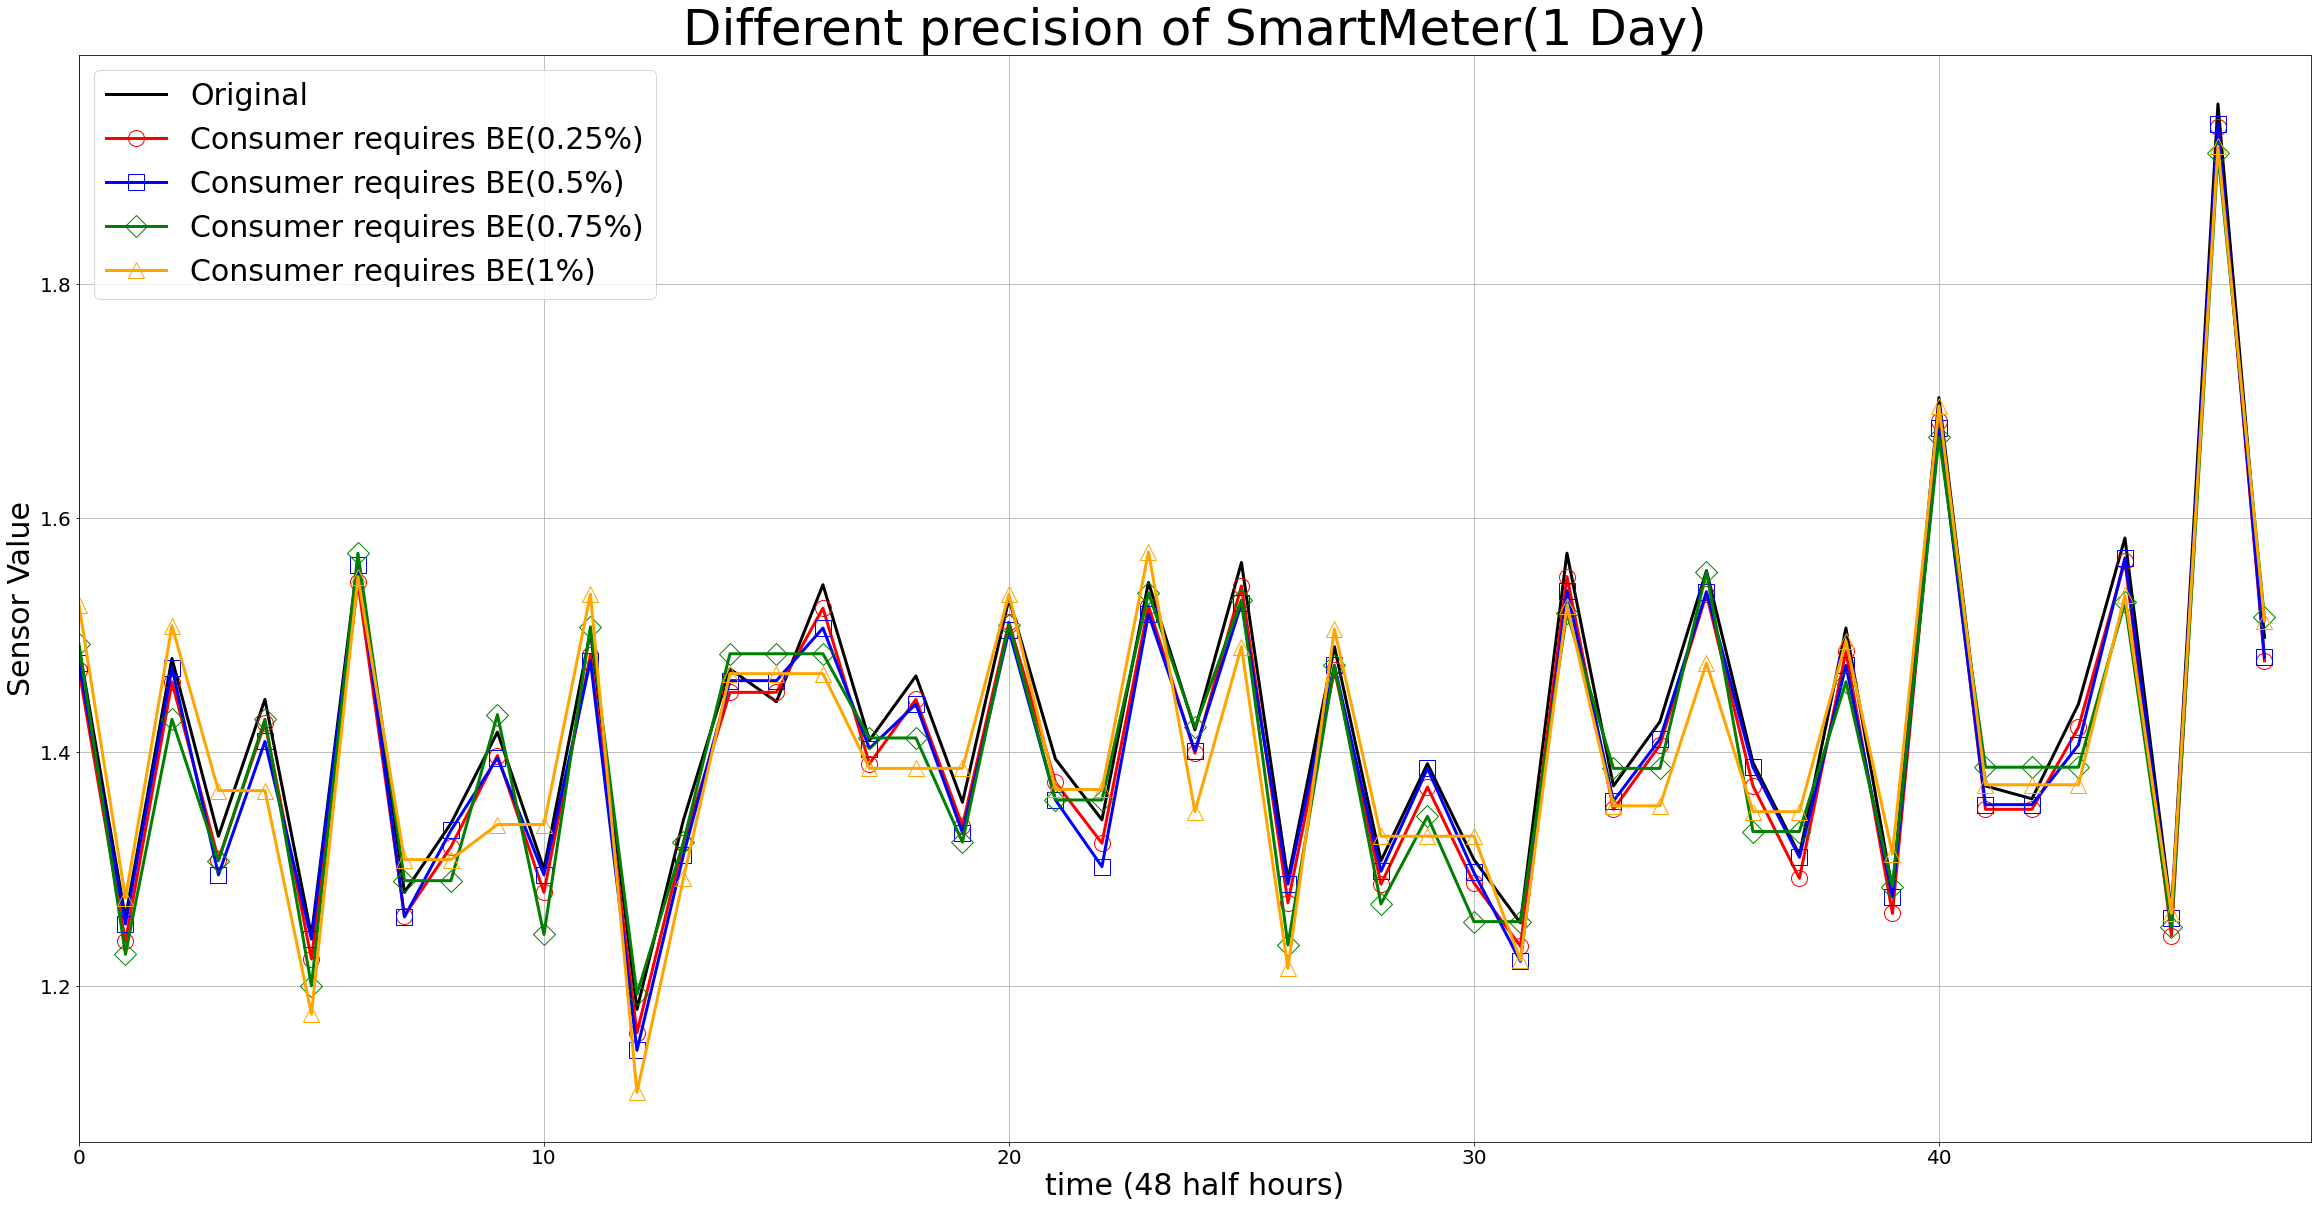

In [17]:
plt.figure(figsize=(40,20))
plt.rc('legend', fontsize='30')

plt.plot(SmartMeter_original,label='Original',color='black',linewidth=3,linestyle='-')
plt.plot(high_precision_result,label='Consumer requires BE(0.25%)',color='red',linewidth=3,linestyle='-',marker='o',markerfacecolor='none',ms=16)
plt.plot(medium_precision_result,label='Consumer requires BE(0.5%)',color='blue',linewidth=3,linestyle='-',marker='s',markerfacecolor='none',ms=16)
plt.plot(low_precision_result,label='Consumer requires BE(0.75%)',color='green',linewidth=3,linestyle='-',marker='D',markerfacecolor='none',ms=16)
plt.plot(low_low_precision_result,label='Consumer requires BE(1%)',color='orange',linewidth=3,linestyle='-',marker='^',markerfacecolor='none',ms=16)


# 限制x軸的顯示範圍
plt.xlim((0,48))
# 限制y軸的顯示範圍
# plt.ylim((10, 25))
plt.title('Different precision of SmartMeter(1 Day)',fontsize=50)
plt.xlabel('time (48 half hours)',fontsize=30)
plt.ylabel('Sensor Value',fontsize=30)

plt.legend()
plt.grid()
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()